<a href="https://colab.research.google.com/github/jinhyukbae/playdata/blob/main/%EA%B7%B8%EB%A6%AC%EB%93%9C%EC%84%9C%EC%B9%98%ED%95%98%EC%9D%B4%ED%8D%BC%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0%ED%8A%9C%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모델 평가

1. 머신 러닝 모델 성능 평가
2. 머신 러닝 알고리즘 문제 분석
3. 머신 러닝 모델 튜닝
4. 성능 지표를 사용한 모델 예측 성능 평가

In [1]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 41.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


* 악성(Malignant tumor)
* 양성(benign tumor)
* 종양 세포 샘플 569개

In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [5]:
df.describe()

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
from sklearn.preprocessing import LabelEncoder


In [8]:
X = df.loc[:,2:] # 0이랑 1 행만 떼어낸 것 
X

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
X = df.loc[:,2:].values
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [11]:
y = df.loc[:,1] # 종양 라벨값 
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: 1, Length: 569, dtype: object

In [ ]:
y = df.loc[:,1].values
y

In [13]:
le = LabelEncoder()


In [ ]:
y = le.fit_transform(y)
y # m 이랑 b가 0 1 로 라벨인코딩 되었다

In [15]:
le.classes_

array(['B', 'M'], dtype=object)

In [16]:
le.transform(['M','B']) # M이 1 B는 0으로 라벨 인코딩 된다 

array([1, 0])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=1)

# stratify 계층적 데이터 추출 옵션 (분류 모델에서 추천!)
# 여러 층으로 분할후 각 층별로 렌덤 데이터 추출, 원래 데이터의 분포와 유사하게 데이터 추출

- 특성 표준화
- 특성 추출
- 파이프라인으로 연결

In [19]:
from sklearn.preprocessing import StandardScaler # 특성표준화
from sklearn.decomposition import PCA # 특성 추출 (주성분분석으로)
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline # 파이프라인으로 연결

In [20]:
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(random_state=1))
# n_components = n 차원 여기선 2차원으로 줄이겠다는 뜻 


In [21]:
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression(random_state=1))])

In [22]:
y_pred = pipe_lr.predict(x_test)


In [26]:
print('테스트 정확도 %.3f' % pipe_lr.score(x_test,y_test))

테스트 정확도 0.956


In [43]:
from sklearn import set_config
set_config(pipe_lr,display='diagram')
# pipe_lr
pipe_lr

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression(random_state=1))])

# 교차검증
## Hold-out Cross Validation
  * 중복되는 값이 나올 수 있음 (머신러닝에 효과적인 방법은 아니다 ovefitting..)
  * 보통 하는 train_test_split이 hold_out 방식 훈련셋,테스트셋으로 나눠서..

## K-fold Cross Validation
  * 중복되지 않게 
  * 

# * LOOCV(Leave-One-Out Cross Validation) 방법
    폴드 갯수와 훈련 샘플 갯수가 같음(k=n)
    하나의 훈련 샘플이 각 반복에서 테스트로 사용됨
    아주 작은 데이터셋 사용시

In [44]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [45]:
kfold = StratifiedKFold(n_splits=10).split(x_train,y_train)

In [48]:
scores = []

In [58]:
for k, (train,test) in enumerate(kfold):
  pipe_lr.fit(x_train[train],y_train[train])
  score = pipe_lr.score(x_train[test], y_train[test])
  scores.append(score)
  print('폴드 :%2d, 클래스 분포 :%s, 정확도: %.3f' % (k+1, np.bincount(y_train[train]), score))

In [59]:
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(x_train[train], y_train[train])
    score = pipe_lr.score(x_train[test], y_train[test])
    scores.append(score)
    print('폴드: %2d, 클래스 분포: %s, 정확도: %.3f' % (k+1, np.bincount(y_train[train]), score))

In [56]:
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV 정확도: 0.951 +/- 0.014


In [60]:
from sklearn.model_selection import cross_val_score


In [62]:
scores = cross_val_score(estimator=pipe_lr,
                         X = x_train,
                         y = y_train,
                         cv= 10,
                         n_jobs=1)

In [69]:
print ('CV 정확도 점수: %s' % scores)

CV 정확도 점수: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]


In [70]:
print('cv 정확도 :%.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

cv 정확도 :0.950 +/- 0.014


In [71]:
from sklearn.model_selection import cross_validate

In [72]:
scores = cross_validate(estimator=pipe_lr,
                        X = x_train,
                        y = y_train,
                        scoring=['accuracy'],
                        cv=10,
                        n_jobs=-1)

In [77]:
scores

{'fit_time': array([0.00650382, 0.02067995, 0.00889516, 0.00827169, 0.00819135,
        0.00883555, 0.00870514, 0.00840878, 0.00884891, 0.00926876]),
 'score_time': array([0.00077987, 0.001333  , 0.00143027, 0.00104523, 0.00107217,
        0.00111485, 0.00112987, 0.00115705, 0.00144434, 0.00115108]),
 'test_accuracy': array([0.93478261, 0.93478261, 0.95652174, 0.95652174, 0.93478261,
        0.95555556, 0.97777778, 0.93333333, 0.95555556, 0.95555556])}

In [73]:
print('cross validate 정확도 %s' % scores['test_accuracy'])

cross validate 정확도 [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]


In [75]:
print('cross validate 점수 %.3f +/- %.3f' % (np.mean(scores['test_accuracy']), np.std(scores['test_accuracy'])))

cross validate 점수 0.950 +/- 0.014


In [78]:
from sklearn.model_selection import cross_val_predict

In [79]:
# 예측 반환 
preds = cross_val_predict(estimator=pipe_lr,
                        X=x_train,
                        y=y_train,
                        cv=10,
                        n_jobs=-1)

In [81]:
preds[:5]

array([0, 0, 0, 0, 0])

In [82]:
# 예측 반환 
preds = cross_val_predict(estimator=pipe_lr,
                        X=x_train,
                        y=y_train,
                        cv=10,
                        method = 'predict_proba', # 예측확률 리턴 predict,predict_log_proba, decision_function 메소드 파라미터
                        n_jobs=-1)

In [86]:
preds[:10]

array([[9.93982352e-01, 6.01764759e-03],
       [7.64328337e-01, 2.35671663e-01],
       [9.72683946e-01, 2.73160539e-02],
       [8.41658121e-01, 1.58341879e-01],
       [9.97144940e-01, 2.85506043e-03],
       [9.99803660e-01, 1.96339882e-04],
       [9.99324159e-01, 6.75840609e-04],
       [2.12145074e-06, 9.99997879e-01],
       [1.28668437e-01, 8.71331563e-01],
       [7.76260670e-04, 9.99223739e-01]])

In [93]:
import matplotlib.pyplot as plt


In [95]:
from sklearn.model_selection import learning_curve

In [100]:
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=1))



In [101]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                        X = x_train,
                                                        y = y_train,
                                                        train_sizes = np.linspace(0.1, 1.0, 10), #0.1부터 1.0까지 분포를 10씩 늘리겠다
                                                        cv = 10,
                                                        n_jobs= -1)


In [102]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


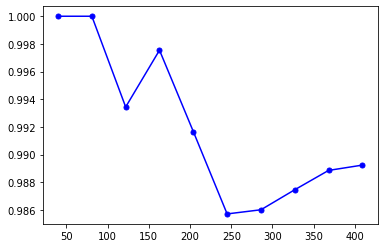

In [103]:
plt.plot(train_sizes, train_mean, 
         color='blue', marker = 'o',
         markersize=5, label = 'training acc')

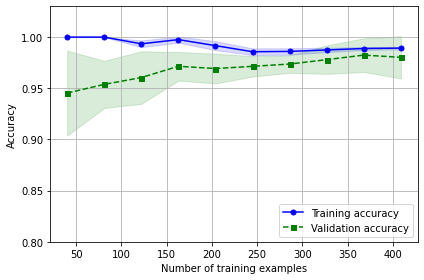

In [105]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1,
                                           max_iter=10000))

train_sizes, train_scores, test_scores = \
                learning_curve(estimator=pipe_lr,
                               X=x_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha = 0.15, color='blue'
                 )

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha= 0.15, color='green'
                 )
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()


# 검증 곡선으로 과대적합과 과소적합 조사

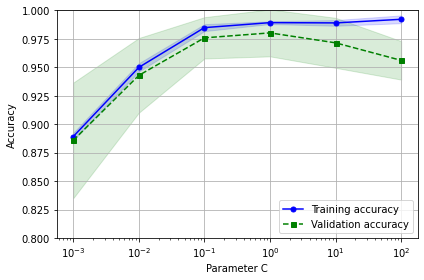

In [106]:
from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] # 범위가 작을수록 과소숫자가 커질수록 과대적합 숫자가 작을수록 규제가 더 크다 

train_scores, test_scores = validation_curve(
    estimator=pipe_lr,
    X=x_train,
    y=y_train,
    param_name='logisticregression__C', # 작을수록 규제가 더 커진다 
    param_range=param_range,
    cv=10
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()



# 그리드 서치를 사용한 머신 러닝 모델 세부 튜닝

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range,  # c 규제 작을수록 규제가 더 커진다 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}] # 리스트가 2개라 2차원 그리드가 됨 


gs = GridSearchCV(estimator=pipe_svc,
                  param_grid = param_grid,
                  refit = True, # 최적의 하이퍼파라미터튜닝 값을 찾았으면 그 값으로 다시 훈련  refit 
                  cv = 10,
                  n_jobs = -1)

gs = gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [108]:
clf = gs.best_estimator_

In [109]:
print('테스트 정확도:%.3f' % clf.score(x_test,y_test))

테스트 정확도:0.974


In [111]:
gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  return_train_score=True,
                  n_jobs=-1)

gs = gs.fit(x_train, y_train)
gs.cv_results_['split0_train_score']

array([0.6405868 , 0.93643032, 0.97555012, 0.98777506, 0.98533007,
       0.99266504, 0.99755501, 1.        , 0.62591687, 0.62591687,
       0.62591687, 0.62591687, 0.62591687, 0.62591687, 0.62591687,
       0.62591687, 0.62591687, 0.62591687, 0.62591687, 0.62591687,
       0.62591687, 0.62591687, 0.62591687, 0.62591687, 0.62591687,
       0.62591687, 0.62591687, 0.62591687, 0.62591687, 0.62591687,
       0.62591687, 0.62591687, 0.62591687, 0.7799511 , 0.94621027,
       0.96577017, 0.62591687, 0.62591687, 0.62591687, 0.62591687,
       0.78484108, 0.94621027, 0.9804401 , 0.99266504, 1.        ,
       1.        , 1.        , 1.        , 0.94621027, 0.97799511,
       0.99266504, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.97799511, 0.98777506, 0.99511002, 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.98533007,
       0.99266504, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [ ]:
gs.cv_results_

In [113]:
gs.cv_results_['mean_train_score']

array([0.6402928 , 0.93724074, 0.97240801, 0.98510406, 0.98803447,
       0.99145447, 0.99707019, 0.9992677 , 0.62637307, 0.62637307,
       0.62637307, 0.62637307, 0.62637307, 0.62637307, 0.62637307,
       0.62637307, 0.62637307, 0.62637307, 0.62637307, 0.62637307,
       0.62637307, 0.62637307, 0.62637307, 0.62637307, 0.62637307,
       0.62637307, 0.62637307, 0.62637307, 0.62637307, 0.62637307,
       0.62637307, 0.62637307, 0.62637307, 0.77070249, 0.94700817,
       0.97167094, 0.62637307, 0.62637307, 0.62637307, 0.62637307,
       0.77949371, 0.94725326, 0.97704753, 0.99291848, 1.        ,
       1.        , 1.        , 1.        , 0.94652096, 0.97753354,
       0.99023257, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.97680064, 0.98852287, 0.99755799, 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.98803387,
       0.99291848, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [114]:
print('테스트정확도: %.3f' % gs.score(x_test,y_test))

테스트정확도: 0.974


In [118]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform #균등분포된 로그값을 만들어서 파라미터 값으로 사용하겠다

distribution = loguniform(0.0001, 1000.0)

param_dist = [{'svc__C': distribution, 
               'svc__kernel': ['linear']},
              {'svc__C': distribution, 
               'svc__gamma': distribution, 
               'svc__kernel': ['rbf']}]

rs = RandomizedSearchCV(estimator=pipe_svc,
                        param_distributions=param_dist,
                        n_iter = 30,
                        random_state=1,
                        n_jobs=-1)

rs = rs.fit(x_train,y_train)

print(rs.best_score_)
print(rs.best_params_)


0.9780219780219781
{'svc__C': 0.27606548656338126, 'svc__kernel': 'linear'}


In [121]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV #반씩 잘라서 having 성공한 놈한테 몰아주는 거 자원 절약에 도움 됨

In [122]:
hgs = HalvingGridSearchCV(estimator=pipe_svc,
                          param_grid=param_grid,
                          cv=10,
                          n_jobs=-1,
                          verbose=1)
hgs = hgs.fit(x_train,y_train)
print(hgs.best_score_)
print(hgs.best_params_)

n_iterations: 3
n_required_iterations: 4
n_possible_iterations: 3
min_resources_: 40
max_resources_: 455
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 72
n_resources: 40
Fitting 10 folds for each of 72 candidates, totalling 720 fits
----------
iter: 1
n_candidates: 24
n_resources: 120
Fitting 10 folds for each of 24 candidates, totalling 240 fits
----------
iter: 2
n_candidates: 8
n_resources: 360
Fitting 10 folds for each of 8 candidates, totalling 80 fits
0.9746825396825397
{'svc__C': 1000.0, 'svc__gamma': 0.0001, 'svc__kernel': 'rbf'}


In [124]:
print(np.sum(hgs.cv_results_['mean_fit_time']))

0.41294202804565433


In [125]:
print('자원리스트:', hgs.n_resources_)
print('후보리스트:', hgs.n_candidates_)

자원리스트: [40, 120, 360]
후보리스트: [72, 24, 8]


In [126]:
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid = param_grid,
                  scoring= 'accuracy',
                  cv = 2) #outer, inner loop 라서 cv = 2



scores = cross_val_score(gs, x_train, y_train, scoring='accuracy', cv=5)

print('cv 정확도: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

cv 정확도: 0.974 +/- 0.015


In [130]:
from sklearn.tree import DecisionTreeClassifier

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid = [{'max_depth': [1,2,3,4,5,6,7,None]}],
                  scoring= 'accuracy',
                  cv = 2)

scores = cross_val_score(gs, x_train, y_train, scoring='accuracy', cv=5)

print('cv 정확도: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

cv 정확도: 0.934 +/- 0.016


In [128]:
pipe_dc = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=0))